# Import

## Import packages

In [66]:
# data preprocessing
import pandas as pd
import numpy as np
from scipy import stats # to compute slope
from datetime import datetime
import math
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # resampling

import warnings
warnings.filterwarnings('ignore')

# data vizualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

# statistic modeling
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Import data

In [67]:
# import data
df = pd.read_excel('default of credit card clients.xls'
                   , sheet_name='Data', skiprows=[0]) #skip the first row

print(f'Confirm: dateset has been loaded successfully')

Confirm: dateset has been loaded successfully


In [68]:
# check the first five rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**There are 25 variables:**

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default payment next month: Default payment (1=yes, 0=no)
                                                   
**Missing definition of values (-2,0) in PAY_n**

*refer to this [post](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608)*
- -2: No consumption; 
- -1: Paid in full; 
- 0: The use of revolving credit; 
- 1 = payment delay for one month; 
- 2 = payment delay for two months; . . .; 
- 8 = payment delay for eight months; 
- 9 = payment delay for nine months and above.

# Data cleansing

**1. For categorical variables, replace numbers with meaningful names** <br> *keep original names for values which lack definitions*

In [69]:
# check unqiue values of categorical variables
df['SEX'].unique()

array([2, 1])

In [70]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

**Note: undefined category: 0**

In [71]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

**Note: undefined category: 0**

In [72]:
def education(education_level):
    
    '''This function takes the value in EDUCATION column 
        and returns a meaningful name. '''
    
    if education_level == 1:
        return 'graduate school'
    elif education_level == 2:
        return 'university'
    elif education_level == 3:
        return 'high school'
    elif education_level == 4:
        return 'others'
    elif education_level == 5 or education_level == 6:
        return 'unknown'
    else:
        return 0

def marriage(marital_status):
    
    '''This function takes the value in MARRIAGE column 
        and returns a meaningful name. '''
    
    if marital_status == 1:
        return 'married'
    elif marital_status == 2:
        return 'single'
    elif marital_status == 3:
        return 'others'
    else:
        return 0

In [73]:
# replace numbers with meaningful names
df['SEX'] = df['SEX'].apply(lambda x: 'male' if x == 1 else 'female')
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: education(x))
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: marriage(x))

In [74]:
# change column name
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

In [75]:
# check the first five rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# A first glance
**Check:**
- size of dataset
- datatype
- missing values
- Statistical summary of numerical variables

**1. Size of dataset**

In [76]:
# check size of dataset
df.shape

(30000, 25)

**Conclusion:** <br> *There are 30000 rows and 25 columns in this dataset. In other words, this dataset contains 30000 clients' info, except for the target variable, there are 24 independent varaibles.*

**2. Data type**

In [12]:
# check data type
df.dtypes

ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_1                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

**Conclusion:** <br> *We have converted categorical variables with meaningful names. Other variables are all numerical.*

**3. Missing values**

In [13]:
# check missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**Conclusion:** <br> *No missing values. However, we should take care of values which lack definitions*

**4. Statistical summary of numerical variables**

In [14]:
pd.options.display.max_columns = None  # show all columns
df.describe()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Conclusion:**
- The minimum age of client is 21. The maximum age of client is 79.
- the maximum number of payment delay months is 8

# Feature engineering

In this part, I am going to create some new features to better capture clients’ financial behavior. 

**PAY_n columns now contain two different types of information, one is the payment delay months, one is whether the client paid delayed or not (paid in full, no consumption, or used revolving credit). I am going to detach these two pieces of info:**
- Create new column named consumed, assign 1 if PAY_n != -2, assign 0 if PAY_n = -2
- Create new column named revolving, assign 1 if PAY_n = 0, assign 0 if PAY_n != 0

I then will replace any -2 and -1 in PAY_n columns with 0. In this case, 0 means the client did not delay the payment. Otherwise, the client paid delayed by n months. 

**To better interpret the variables and tell the story, I am going to compute *the average bill amount and average payment amount* for each client, also compute *the trend of bill amount and payment amount* throughout the past six months, which will be achieved by fitting bill amounts/payment amounts into a linear regression model and calculating the slope.**

## PAY_n columns

**1. create two new columns: consumed_n and revolving_n**
- if PAY_n = -2 then consumed = 0
- if PAY_n != -2 then consumed = 1
- if PAY_n = 0 then revolving = 1
- if PAY_n != 0 then revolving = 0

In [77]:
df['consumed_1'] = np.where(df['PAY_1'] != -2, 1, 0)
df['revolving_1'] = np.where(df['PAY_1'] == 0, 1, 0)

df['consumed_2'] = np.where(df['PAY_2'] != -2, 1, 0)
df['revolving_2'] = np.where(df['PAY_2'] == 0, 1, 0)

df['consumed_3'] = np.where(df['PAY_3'] != -2, 1, 0)
df['revolving_3'] = np.where(df['PAY_3'] == 0, 1, 0)

df['consumed_4'] = np.where(df['PAY_4'] != -2, 1, 0)
df['revolving_4'] = np.where(df['PAY_4'] == 0, 1, 0)

df['consumed_5'] = np.where(df['PAY_5'] != -2, 1, 0)
df['revolving_5'] = np.where(df['PAY_5'] == 0, 1, 0)

df['consumed_6'] = np.where(df['PAY_6'] != -2, 1, 0)
df['revolving_6'] = np.where(df['PAY_6'] == 0, 1, 0)

**2. replace -1 and -2 in PAY_n with 0**

In [78]:
df.loc[df["PAY_1"] == -1, "PAY_1"] = 0
df.loc[df["PAY_1"] == -2, "PAY_1"] = 0

df.loc[df["PAY_2"] == -1, "PAY_2"] = 0
df.loc[df["PAY_2"] == -2, "PAY_2"] = 0

df.loc[df["PAY_3"] == -1, "PAY_3"] = 0
df.loc[df["PAY_3"] == -2, "PAY_3"] = 0

df.loc[df["PAY_4"] == -1, "PAY_4"] = 0
df.loc[df["PAY_4"] == -2, "PAY_4"] = 0

df.loc[df["PAY_5"] == -1, "PAY_5"] = 0
df.loc[df["PAY_5"] == -2, "PAY_5"] = 0

df.loc[df["PAY_6"] == -1, "PAY_6"] = 0
df.loc[df["PAY_6"] == -2, "PAY_6"] = 0

## BILL_AMTn and PAY_AMTn columns

**1. create two new columns: BILL_AMT_avg and PAY_AMT_avg**
<br>compute the average amount of bill and the average amount of payment for each client in the past six months.

In [79]:
df['BILL_AMT_avg'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['PAY_AMT_avg'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

**2. create two new columns: BILL_AMT_trend and PAY_AMT_trend**
<br>compute the trend of bill amount and payment amount for each client in the past six months.

In [80]:
# create a function to calculate the slope
def calc_slope(row):
    
    '''This function takes a list of six numbers and returns the slope 
    of the linear regression model fitted by these six numbers (in order).
    This function will return NULL if the slope is 0'''
    
    a = stats.linregress(row, y=[1, 2, 3, 4, 5, 6])
    
    return pd.Series(a.slope)

In [81]:
# Slice and reverse BILL_AMT_n columns
# We need to reverse columns because we want to put April the first and September the last.
BILL_AMT_df = df[df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].columns[::-1]]

# create BILL_AMT_trend column and fill in with slope for each row
df['BILL_AMT_trend'] = BILL_AMT_df.apply(calc_slope, axis=1)

In [82]:
# Slice and reverse PAY_AMT_n columns
# We need to reverse columns because we want to put April the first and September the last.
PAY_AMT_df = df[df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].columns[::-1]]

# create PAY_AMT_trend column and fill in with slope for each row
df['PAY_AMT_trend'] = PAY_AMT_df.apply(calc_slope, axis=1)

In [83]:
# check the statistical summary of the new created columns
df[['BILL_AMT_trend', 'PAY_AMT_trend']].describe()

,BILL_AMT_trend,PAY_AMT_trend
count,28773.000000,28350.000000
mean,0.000164,0.000957
std,0.021717,0.029299
min,-0.750000,-1.800000
25%,-0.000267,-0.000052
50%,0.000043,0.000168
75%,0.000171,0.001032
max,3.000000,3.000000


**Conclusion:**
- The maximum slope is 3, the minimum slope is -1.8.
- There should be NULLs in some rows because the count is less than total count.

In [84]:
# check NULLs
df[['BILL_AMT_trend', 'PAY_AMT_trend']].isnull().sum()

BILL_AMT_trend    1227
PAY_AMT_trend     1650
dtype: int64

In [85]:
# Fill in NULLs with 0
df[['BILL_AMT_trend', 'PAY_AMT_trend']] = df[['BILL_AMT_trend', 'PAY_AMT_trend']].fillna(0)

In [86]:
# check
df[['BILL_AMT_trend', 'PAY_AMT_trend']].isnull().sum()

BILL_AMT_trend    0
PAY_AMT_trend     0
dtype: int64

# EDA

**Executive summary:**
- Imbalanced class, resampling technique should be applied.
- Majority of clients have given credits less than 200K.
- Males and married people are more likely to have default payment.
- EDUCATION and MARRIAGE have some undefined minority groups, should be removed.
- We saw some highly correlated variables. Tree-based model which can handle multicollinearity should be applied. Dimensionality reduction should be considered.

## Target variable

**How many clients have default payment next month?**

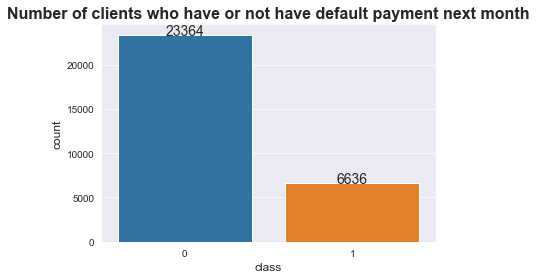

In [25]:
ax = sns.countplot(x= 'default payment next month'
                    , data=df)

# set title and labels   
ax.set_title('Number of clients who have or not have default payment next month'
             , fontsize=16
             , fontweight='bold')
ax.set_xlabel('class', fontsize=12)
ax.set_ylabel('count', fontsize=12)

# add numbers above the bar
for i in ax.patches:    
     ax.text(i.get_x()+i.get_width()/2, i.get_height()+0.75, i.get_height(),  
     horizontalalignment='center',size=14)

plt.show()

**Conclusion:**
- Clients who have default payment next month acount for about 22% of the population.
- We saw imbalanced classes. Resampling should be considered for modeling.

## Categorical variables

**1. LIMIT_BAL**

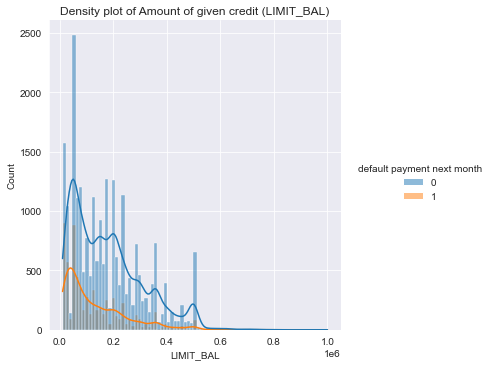

In [26]:
sns.displot(data=df
            , x="LIMIT_BAL"
            , kde=True
            , hue='default payment next month'
            ).set(title='Density plot of Amount of given credit (LIMIT_BAL)')

**Conclusion:**
- Majority of clients have given credits less than 200K.
- Clients who have default payment have lower given credits.

**2. Age**

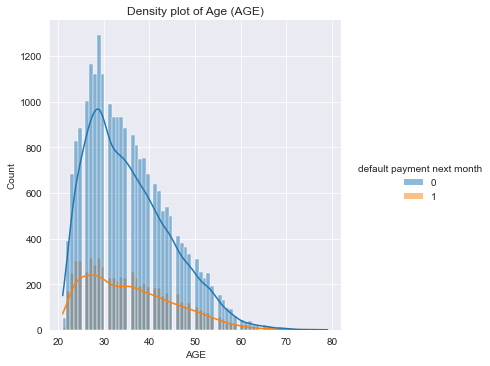

In [27]:
sns.displot(data=df
            , x="AGE"
            , kde=True
            , hue='default payment next month'
            ).set(title='Density plot of Age (AGE)')

**Conclusion:**
- Majority of clients are between 25-30.
- For clients who have default payment, we saw two peaks, late 20s and early 30s, and late 30s and early 40s. 

**3. Gender**

[Text(0.5, 1.0, 'Distribution of gender (SEX)')]

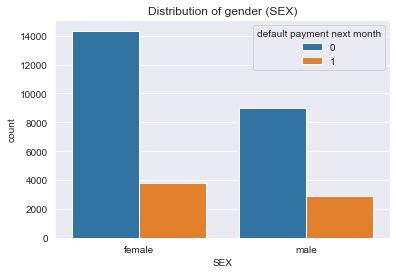

In [28]:
sns.countplot(data=df
              , x="SEX"
              , hue='default payment next month'
             ).set(title='Distribution of gender (SEX)')

**Conclusion:**
- We saw more females in this dataset than males overall.
- The proportion of default payment is higher in male group. In other words, gender might be a good differentiator for modeling. 

**4. Education**

[Text(0.5, 1.0, 'Distribution of education level (EDUCATION)')]

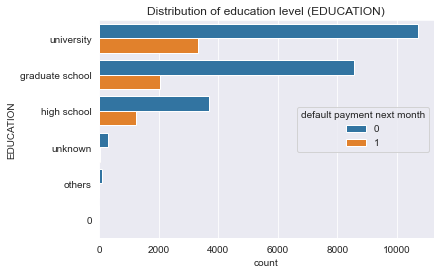

In [29]:
sns.countplot(data=df
              , hue='default payment next month'
              , y="EDUCATION"
             ).set(title='Distribution of education level (EDUCATION)')

**Conclusion:**
- We saw some undefined data ponts, which was a minority group. They should be removed.
- The majority of clients have at least post-secondary degree. However, we did not see a clear negative correlation between education level and likelyhood of default payment.

**5. Marriage**

[Text(0.5, 1.0, 'Distribution of marital status (MARRIAGE)')]

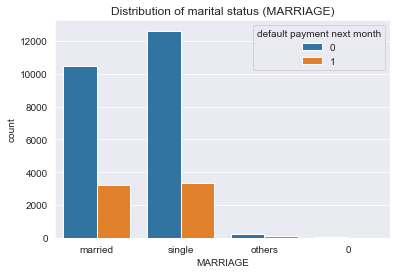

In [30]:
sns.countplot(data=df
              , hue='default payment next month'
              , x="MARRIAGE"
             ).set(title='Distribution of marital status (MARRIAGE)')

**Conclusion:**
- We saw some undefined data ponts, which was a minority group. They should be removed.
- We saw more single people in this dataset. However, married people are more likely to have default payment.

## Correlation

(38.5, -0.5)

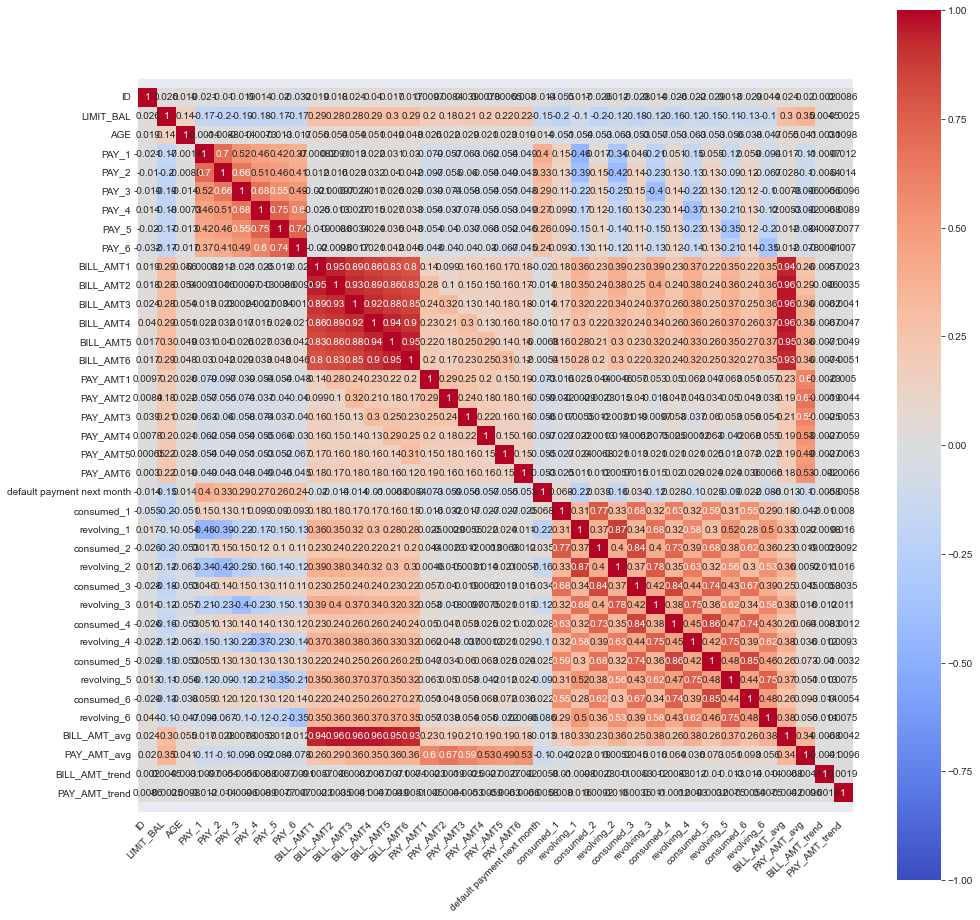

In [31]:
# Correlations
corr = df.corr()

f, ax = plt.subplots(figsize=(16,16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Preprocessiong

## Remove minority groups

**We are going to remove rows which contain undefined datapoints in EDUCATION and MARRIAGE columns.**

In [87]:
# For validation use
pre_len = len(df)

# Remove minority groups: EDUCATION & MARRIAGE
df = df.loc[~((df['EDUCATION'] == 0) | (df['EDUCATION'] == 'unknown') | (df['EDUCATION'] == 'others'))]
df = df.loc[~((df['MARRIAGE'] == 0) | (df['MARRIAGE'] == 'others'))]

# Validation
new_len = len(df)
res = pre_len - new_len
percent = round(res/pre_len*100, 2)

print(f'{res} rows removed, account for {percent}% of total dataset.')

837 rows removed, account for 2.79% of total dataset.


## Remove ID column

**We are going to remove ID column which has no relation to the target variable**

In [88]:
df.drop(['ID'], axis=1, inplace=True)

In [89]:
# check
df.shape

(29163, 40)

## Remove BILL_AMTn and PAY_AMTn columns

In [90]:
# create a list of column names for BILL_AMTn and PAY_AMTn
lst_AMTn = ['BILL_AMT'+str(i) for i in range(1,7)] + ['PAY_AMT'+str(i) for i in range(1,7)]

# drop columns
df.drop(lst_AMTn, axis=1, inplace=True)

In [91]:
# check
df.shape

(29163, 28)

## Split dataset

**Split dataset into y (dependent variable) and df_X (independent variables)**

In [92]:
y = df['default payment next month']
X = df.drop('default payment next month', axis=1)

In [93]:
# check
X.shape

(29163, 27)

In [94]:
y.shape

(29163,)

## Encoding

**Use one-hot encoding to convert categorical variables into a binary vector representation.**

In [95]:
# get dummies for categorical variables
X = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

In [96]:
# check
X.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,consumed_1,revolving_1,consumed_2,revolving_2,consumed_3,revolving_3,consumed_4,revolving_4,consumed_5,revolving_5,consumed_6,revolving_6,BILL_AMT_avg,PAY_AMT_avg,BILL_AMT_trend,PAY_AMT_trend,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
0,20000,24,2,2,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1284.000000,114.833333,0.000953,0.002612,1,0,0,0,1,1,0
1,120000,26,0,2,0,0,0,2,1,0,1,0,1,1,1,1,1,1,1,0,2846.166667,833.333333,-0.002131,-0.001235,1,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,16942.166667,1836.333333,0.000177,-0.000646,1,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,38555.666667,1398.000000,0.000149,0.003479,1,0,0,0,1,1,0
4,50000,57,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,1,1,18223.166667,9841.500000,-0.000069,0.000061,0,1,0,0,1,1,0


In [97]:
# remove columns: SEX_female and MARRIAGE_single
X = X.drop(['SEX_female', 'MARRIAGE_single'], axis=1)

## Split dataset

**Split data into training set and test set**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
# check
X_train.shape

(21872, 29)

In [100]:
y_train.shape

(21872,)

In [101]:
X_test.shape

(7291, 29)

In [102]:
y_test.shape

(7291,)

## Resampling for minority class

**We observed a class imbalance issue in this dataset. Therefore, we decided to use a resampling technique SMOTE here. In this particular scenario, we oversample the minority class by synthetically generating additional samples.**

In [103]:
sm = SMOTE(random_state = 123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [104]:
# check
X_train_sm.shape

(34002, 29)

In [116]:
y_train_sm.shape

(34002,)

# Modeling

**We are going to fit a base model using the following classifiers:**
- Logistics regression
- Decision tree
- Random forest
- XGBoost

**We are going to use 5-folds cross validation technique to improve the accuracy**

**We are going to compare model performance by looking at:**
- F-1 score
- ROC_AUC
- computation time

## Pre-written functions

In [50]:
def base_model(model_dic, X_train, y_train):
    
    '''This function takes a dictionary of classifiers, 
       training dataset, and cross validation instance, 
       and return a f1 score and ROC of each base model 
       in a data frame format'''
    
    # create a dictionary to store data
    dic = {'model_name' : []
          , 'f1' : []
          , 'roc_auc' : []
          , 'running_secs' : []}
    
    for model_name, classifier in model_dic.items():
        
        # append model name
        dic['model_name'].append(model_name)
        
        # start time
        start = datetime.now()
        
        # calculate f1 and roc_auc using cross validation technique
        model = classifier
        
        f1_lst = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
        roc_auc_lst = cross_val_score(model, X_train, y_train, cv=5, scoring = 'roc_auc')
    
        f1 = round(f1_lst.mean(), 4)
        roc_auc = round(roc_auc_lst.mean(), 4)
        
        # running time
        running_secs = (datetime.now() - start).seconds
        
        # append
        dic['f1'].append(f1)
        dic['roc_auc'].append(roc_auc)
        dic['running_secs'].append(running_secs)
    
    # convert dictionary into a data frame
    df_base_model_performance = pd.DataFrame.from_dict(dic)
    
    return df_base_model_performance

In [51]:
# Confusion Matrix Image
def cm(name_cm, model_name): #logred_cm, Logistics Regression
    
    '''This function returns confusion matrix image'''
    
    sns.set(rc={'figure.figsize':(6,4)}) # adjust figure size
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    annot_kws = {"ha": 'left',"va": 'top'}
    sns.heatmap(pd.DataFrame(name_cm), annot=True, annot_kws=annot_kws, cmap="YlGnBu" ,fmt='g')
    # change the name of the cm here

    #sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues') # this is for percentage

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom, top)

    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f'Confusion matrix for {model_name} Model', fontsize=18)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

## Fit a base model

In [117]:
# model dictionary
model_dic = {'Logistic regression' : LogisticRegression()
            , 'Decision tree' : DecisionTreeClassifier()
            , 'Random forest' : RandomForestClassifier()
            , 'XGBoost' : XGBClassifier(eval_metric='mlogloss')} # to get rid of warning

In [118]:
base_model_performance = base_model(model_dic, X_train_sm, y_train_sm)

In [119]:
base_model_performance

,model_name,f1,roc_auc,running_secs
0,Logistic regression,0.6634,0.6836,1
1,Decision tree,0.7696,0.7836,2
2,Random forest,0.8197,0.9238,45
3,XGBoost,0.7901,0.9081,60


**Conclusion:**
- Emsemble learning models randome forest and XGBoost outperformed logistic regression and decision tree
- Both random forest and XGBoost are computationally expensive, however with better performance
- Random forest (base model) the is best performance
- We are going to tuning random forest

## Model tuning

**Tune hyperparameters**

*For Model tuning, I referred this [post](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)*

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Random search

In [56]:
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf
                               , param_distributions = random_grid
                               , n_iter = 20
                               , cv = 3
                               , verbose = 2
                               , random_state = 42
                               , n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [57]:
# best parameters using random grid search
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [58]:
# Get the best model
best_model = rf_random.best_estimator_

### f1 and roc_auc using cross validation

In [59]:
# compute f1 and roc_auc for best model
f1_best = cross_val_score(best_model, X_train_sm, y_train_sm, cv=5, scoring='f1').mean()
roc_auc_best = cross_val_score(best_model, X_train_sm, y_train_sm, cv=5, scoring = 'roc_auc').mean()

# compare with base model
f1_base = base_model_performance.loc[base_model_performance['model_name'] == 'Random forest', 'f1'].item()
roc_auc_base = base_model_performance.loc[base_model_performance['model_name'] == 'Random forest', 'roc_auc'].item()

f1_improvement = round((f1_best - f1_base)/f1_base*100, 2)
roc_auc_improvement = round((roc_auc_best - roc_auc_base)/roc_auc_base*100, 2)

# conclusion
print(f'For the best randome forest model, f1 is {f1_best}, improved {f1_improvement}%, roc_auc is {roc_auc_best}, improved {roc_auc_improvement}%')

For the best randome forest model, f1 is 0.8196574942329379, improved -0.3%, roc_auc is 0.9334821905581718, improved 0.18%


**Conclusion: hyperparameters tunning did not make a significant improvement on f1 or auc score.**

## Best model performance evaluation

In [112]:
best_model = RandomForestClassifier()
best_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [110]:
# compute f1 and roc_auc using text dataset
f1_best_test = round(cross_val_score(best_model, X_test, y_test, cv=5, scoring='f1').mean(), 4)
roc_auc_best_test = round(cross_val_score(best_model, X_test, y_test, cv=5, scoring = 'roc_auc').mean(), 4)
recall_best_test = round(cross_val_score(best_model, X_test, y_test, cv=5, scoring = 'recall').mean(), 4)
precision_best_test = round(cross_val_score(best_model, X_test, y_test, cv=5, scoring = 'precision').mean(), 4)

# conclusion
print(f'Evaluate model performance using test dataset')
print(f'f1 = {f1_best_test}')
print(f'roc_auc = {roc_auc_best_test}')
print(f'recall = {recall_best_test}')
print(f'precision = {precision_best_test}')

Evaluate model performance using test dataset
f1 = 0.4803
roc_auc = 0.7653
recall = 0.3902
precision = 0.651


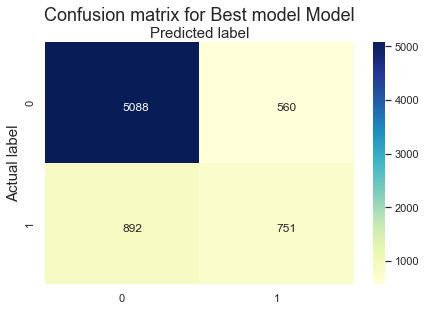

In [113]:
# Plot the confusion matrix for the best model
best_pred = best_model.predict(X_test)
rf_cm = confusion_matrix(y_test, best_pred)
cm(rf_cm, 'Best model')

### Import features

LIMIT_BAL = 0.08096773122573438
AGE = 0.07191944426102828
PAY_1 = 0.0413327069967795
PAY_2 = 0.04377117561373122
PAY_3 = 0.02551599233418502
PAY_4 = 0.01564876532951427
PAY_5 = 0.01707183987320274
PAY_6 = 0.01262459286698897
consumed_1 = 0.004543839646343339
revolving_1 = 0.07411489104888265
consumed_2 = 0.004845430748579523
revolving_2 = 0.023761801810591305
consumed_3 = 0.004234632828514902
revolving_3 = 0.012043827168614189
consumed_4 = 0.0036801374140740368
revolving_4 = 0.0153048239497074
consumed_5 = 0.004226674344243559
revolving_5 = 0.012338115297118672
consumed_6 = 0.005491404605897778
revolving_6 = 0.011355354093371217
BILL_AMT_avg = 0.10641130666460426
PAY_AMT_avg = 0.09513537395694867
BILL_AMT_trend = 0.08309275251443528
PAY_AMT_trend = 0.0811114988587316
SEX_male = 0.01669729337158325
EDUCATION_graduate school = 0.04018078717330922
EDUCATION_high school = 0.030686027767811715
EDUCATION_university = 0.043516731573819925
MARRIAGE_married = 0.018375046661653294


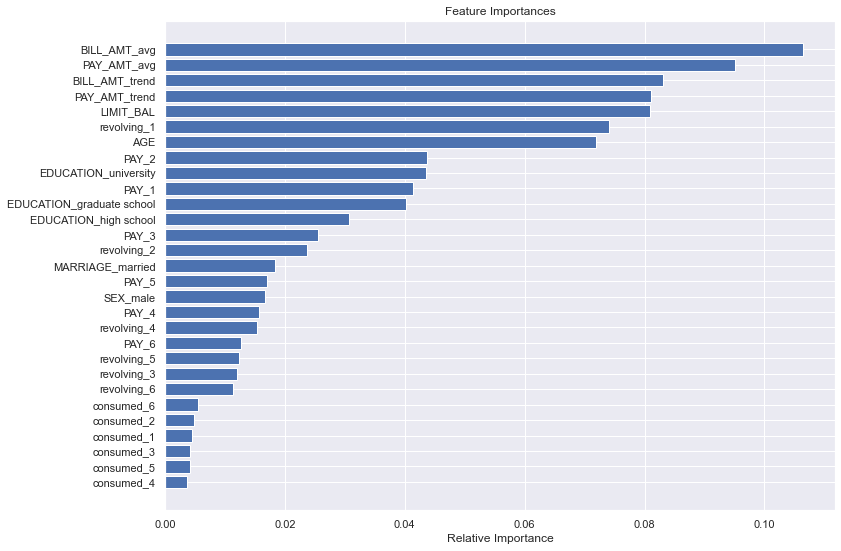

In [114]:
# Get the feaature importance
feature_importance = best_model.feature_importances_

# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# Visualize feature from the most important to the least important
indices = np.argsort(feature_importance)

plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Executive summary and Conclusion

**F1 score: 0.48**
<br>The F1 score is a metric used to evaluate a model's performance, where a higher score indicates better performance. With an F1 score of 0.48, the model has achieved a moderate level of performance. However, if we set a satisfactory threshold at 0.5, the model's performance falls slightly below this benchmark.

**Recall: 0.39**
<br>In the credit card world, recall is often more important. The recall of this model is 0.39, meaning that among all clients who will default next month, the model successfully identifies 39% of them.

**AUC: 0.76**
<br>The AUC is another metric used to evaluate classification models, ranging from 0 to 1. A higher score indicates better performance. A score of 0.5 implies the model performs no better than random choice. With an AUC score of 0.76, this model demonstrates good performance.

**Important features:**
- The average bill amount and average pay amount in the last six months have the most significant impact on the model's predictions. They are followed by the trend of bill amount, trend of pay amount, and total given credits. 
- Among demographic data, the client's age plays the most important role in predicting the target class. Whether the client has consumption or not has the least impact on the prediction.
- Regarding the past six months' data, the closer it is to the next month, the greater its impact on prediction. For example, repayment status in September and August, as well as whether the client used revolving credit in September, rank higher in importance compared to earlier months.